In [1]:
import numpy as np
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
fp = "C:\\Users\\hikaru\\Desktop\\aim\\AimlabTaskData_2023-07-26.04.22.24\\taskData.json"

with open(fp, 'r') as f:
    task_data = json.load(f)

"""
klutch_id == user id
task_names

CsLevel.Lowgravity56.VT x WHJ.RWFAP2 (smooth strafe 1)
CsLevel.Lowgravity56.VT Adjus.ROJF3J (Adjust Track easy 2)
CsLevel.Lowgravity56.VT Berry.RUPVB5 (BerryTS Static Entry 3)
CsLevel.Lowgravity56.VT x WHJ.RWIM32 (small pokeball 4)
CsLevel.Lowgravity56.VT x WHJ.RWFFD8 (hipfire small pokeball 5)
CsLevel.VT Empyrean.VT 1w4ts.R1WXON  (1w4ts Clusters 6)
CsLevel.Lowgravity56.VT Angle.RVQZXH (Dynamic micro angleshot 7)
CsLevel.Lowgravity56.VT x WHJ.RWFGTB (two shot pressure 8)
"""

'\nklutch_id == user id\ntask_names\n\nCsLevel.Lowgravity56.VT x WHJ.RWFAP2 (smooth strafe 1)\nCsLevel.Lowgravity56.VT Adjus.ROJF3J (Adjust Track easy 2)\nCsLevel.Lowgravity56.VT Berry.RUPVB5 (BerryTS Static Entry 3)\nCsLevel.Lowgravity56.VT x WHJ.RWIM32 (small pokeball 4)\nCsLevel.Lowgravity56.VT x WHJ.RWFFD8 (hipfire small pokeball 5)\nCsLevel.VT Empyrean.VT 1w4ts.R1WXON  (1w4ts Clusters 6)\nCsLevel.Lowgravity56.VT Angle.RVQZXH (Dynamic micro angleshot 7)\nCsLevel.Lowgravity56.VT x WHJ.RWFGTB (two shot pressure 8)\n'

In [3]:
tasks = {
    "CsLevel.Lowgravity56.VT x WHJ.RWFAP2": '1_strafe_track',
    "CsLevel.Lowgravity56.VT Adjus.ROJF3J": '2_adjust_track',
    "CsLevel.Lowgravity56.VT Berry.RUPVB5": '3_static_entry',
    "CsLevel.Lowgravity56.VT x WHJ.RWIM32": '4_wide_pokeball',
    "CsLevel.Lowgravity56.VT x WHJ.RWFFD8": '5_close_pokeball',
    "CsLevel.VT Empyrean.VT 1w4ts.R1WXON":  '6_1w4ts_clusters',
    "CsLevel.Lowgravity56.VT Angle.RVQZXH": '7_dynamic_micro',
    "CsLevel.Lowgravity56.VT x WHJ.RWFGTB": '8_two_pressure',
}

cols = ('taskId', 'taskName', 'score', 'mode', 'performance', 'startedAt', 'endedAt')

In [4]:
# process data
data_dict = {key: [] for key in cols}

for task in task_data:
    if task['taskName'] not in tasks:
        continue
    for key in cols:
        value = task[key]
        if value in tasks:
            value = tasks[value]
        if key in ('startedAt', 'endedAt'):
            value = datetime.strptime(value, '%Y-%m-%dT%H:%M:%S')

        data_dict[key].append(value)

data_df = pd.DataFrame(data_dict)
data_df.head()

,taskId,taskName,score,mode,performance,startedAt,endedAt
0,331,1_strafe_track,525,42,"{""shotsTotal"":2428,""hitsTotal"":525.0,""missesTo...",2023-07-09 23:37:29,2023-07-09 23:38:55
1,332,1_strafe_track,1359,42,"{""shotsTotal"":5991,""hitsTotal"":1359.0,""missesT...",2023-07-09 23:39:18,2023-07-09 23:40:18
2,333,1_strafe_track,1578,42,"{""shotsTotal"":5984,""hitsTotal"":1578.0,""missesT...",2023-07-09 23:41:49,2023-07-09 23:42:49
3,334,2_adjust_track,1984,42,"{""shotsTotal"":5998,""hitsTotal"":1984.0,""missesT...",2023-07-09 23:44:00,2023-07-09 23:45:01
4,335,2_adjust_track,1873,42,"{""shotsTotal"":5992,""hitsTotal"":1873.0,""missesT...",2023-07-09 23:45:19,2023-07-09 23:46:19


In [5]:
# separate performance data
perf_dict = {}
perf_dict['taskId'] = data_dict['taskId']
perf_keys = ast.literal_eval(data_dict['performance'][0]).keys()
for key in perf_keys:
    perf_dict[key] = []
print(perf_keys)

for perf in data_dict['performance']:
    perf_info = ast.literal_eval(perf)
    for k, v in perf_info.items():
        perf_dict[k].append(v)

perf_df = pd.DataFrame(perf_dict)
perf_df.head()

dict_keys(['shotsTotal', 'hitsTotal', 'missesTotal', 'avgDist', 'damageTotal', 'timePerKill', 'killTotal', 'targetsTotal', 'accTotal', 'headshots', 'bodyshots'])


,taskId,shotsTotal,hitsTotal,missesTotal,avgDist,damageTotal,timePerKill,killTotal,targetsTotal,accTotal,headshots,bodyshots
0,331,2428,525.0,1903.0,7.899969,0.0,0.0,0,2,21.676300,0,525
1,332,5991,1359.0,4632.0,8.581873,0.0,0.0,0,2,22.684025,0,1359
2,333,5984,1578.0,4406.0,7.816439,0.0,0.0,0,2,26.445452,0,1578
3,334,5998,1984.0,4014.0,11.436398,0.0,0.0,0,39,33.105290,0,1984
4,335,5992,1873.0,4119.0,11.400455,0.0,0.0,0,37,31.258345,0,1873


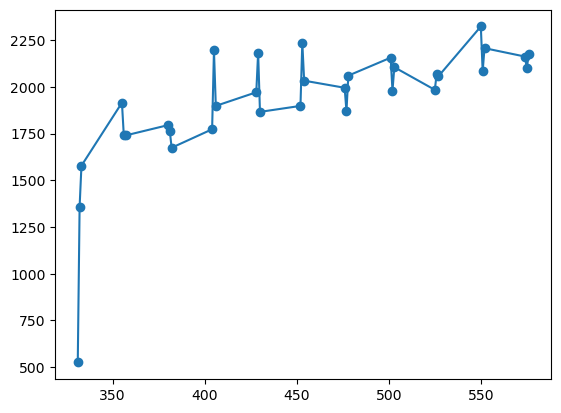

In [6]:
data_selection = data_df[data_df['taskName']=='1_strafe_track']

plt.plot(data_selection['taskId'], data_selection['score'], 'o-')